In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [14]:
with open("Results/LR_model_results.json", "r") as f:
    LR_results = json.load(f)
with open("Results/RF_model_results.json", "r") as f:
    RF_results = json.load(f)
with open("Results/XGB_model_results.json", "r") as f:
    XGB_results = json.load(f)
with open("Results/SOM_RF_model_results.json", "r") as f:
    SOM_RF_results = json.load(f)
with open("Results/SOM_XGB_model_results.json", "r") as f:
    SOM_XGB_results = json.load(f)
with open("Results/K-Means_RF_model_results.json", "r") as f:
    KMeans_RF_results = json.load(f)
with open("Results/K-Means_XGB_model_results.json", "r") as f:
    KMeans_XGB_results = json.load(f)

In [19]:
# List of your result files
model_files = {
    "Logistic Regression": "Results/LR_model_results.json",
    "Random Forest": "Results/RF_model_results.json",
    "XGBoost": "Results/XGB_model_results.json",
    "SOM + Random Forest": "Results/SOM_RF_model_results.json",
    "SOM + XGBoost": "Results/SOM_XGB_model_results.json",
    "K-Means + Random Forest": "Results/K-Means_RF_model_results.json",
    "K-Means + XGBoost": "Results/K-Means_XGB_model_results.json"
}

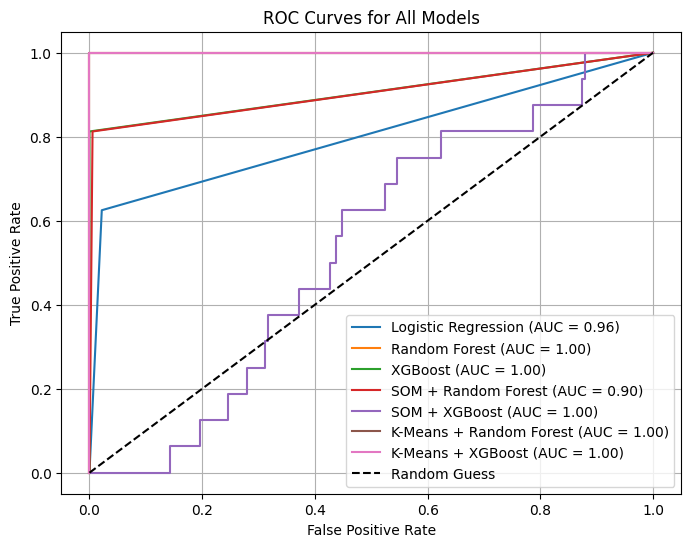

In [16]:
plt.figure(figsize=(8,6))

# Loop through models and plot ROC curves
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    
    fpr = results["fpr"]
    tpr = results["tpr"]
    auc = results["roc_auc"]
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot baseline (random classifier)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

# Format plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

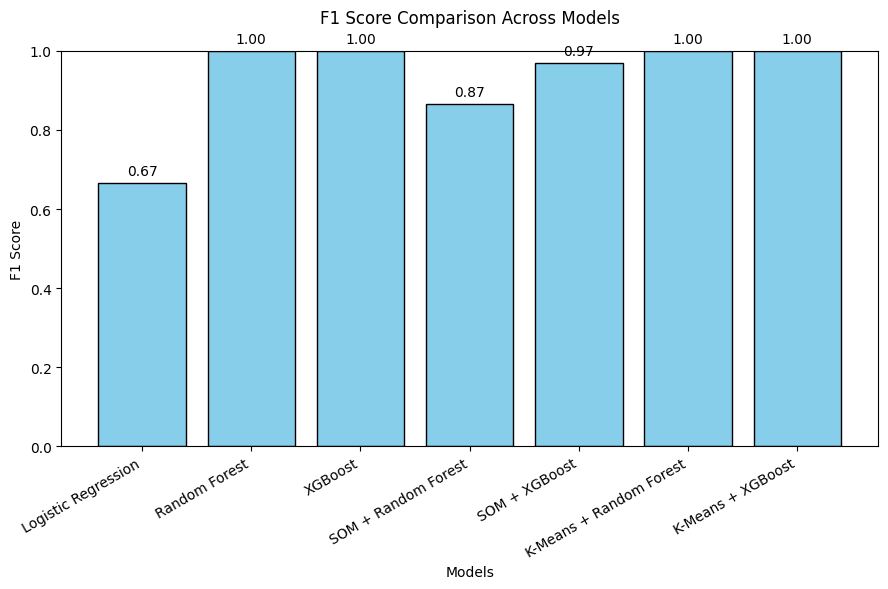

In [17]:
f1_scores = {}
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    f1_scores[model_name] = results["f1_score"]  # <-- check exact key name in JSON

# Plot
plt.figure(figsize=(9,6))
plt.bar(f1_scores.keys(), f1_scores.values(), color="skyblue", edgecolor="black")

plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.title("F1 Score Comparison Across Models",pad=20)
plt.ylim(0, 1)  # scores between 0 and 1
plt.xticks(rotation=30, ha="right")

# Annotate values on top of bars
for i, (model, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.02, f"{score:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

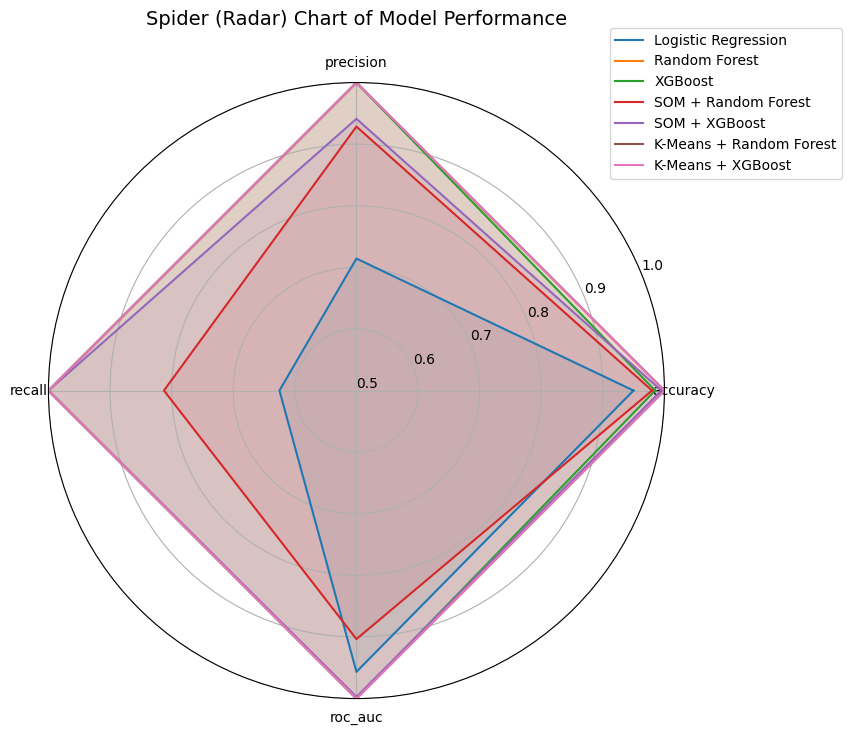

In [18]:
metrics = ["accuracy", "precision", "recall", "roc_auc"]
num_vars = len(metrics)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Loop through models
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)

    values = [results[m] for m in metrics]
    values += values[:1]  # close the circle

    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # adjust based on your metrics scale
ax.set_ylim(0.5, 1.0)  # metrics are between 0 and 1

plt.title("Spider (Radar) Chart of Model Performance", size=14, y=1.08)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
LR_results["confusion_matrix"]

[[179, 4], [6, 10]]

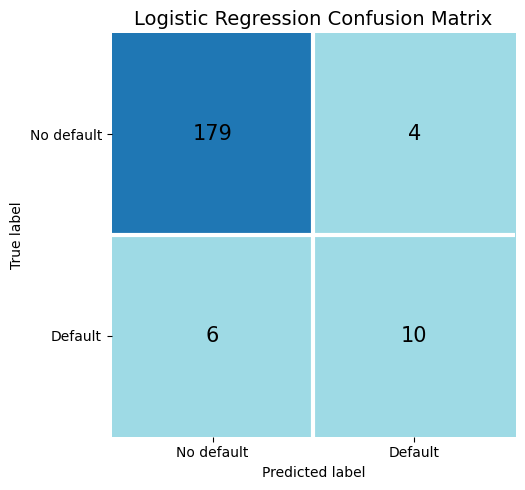

In [29]:
cm = np.array(LR_results["confusion_matrix"])
  # Assuming confusion matrix is stored in the results
# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No default', 'Default'])

# Plot with your custom settings
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

# Make the numbers bigger
for text in disp.text_.ravel():
    text.set_fontsize(15)
    text.set_color('black')

n_classes = cm.shape[0]
for i in range(1, n_classes):
    ax.axhline(i - 0.5, color='white', linewidth=3)
    ax.axvline(i - 0.5, color='white', linewidth=3)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.savefig("Plots/Confusion Matricies/Logistic_Regression_cm.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
